In [20]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

Se tiene una muetra cuya edad se quiere determinar. Para eso, se mide la concentración de $^{14}C$ radiactivo presente en la muestra, $\frac{^{14}C}{^{12}C}$,  ("a tiempo $t$") y la cantidad STD ("a tiempo 0"). Se define $$R_{14}=\frac{^{14}C(t)}{^{14}C(0)} = \frac{\frac{^{14}C(t)}{^{12}C}}{\frac{^{14}C(0)}{^{12}C_0}} = \frac{R(t)}{R_0}$$ donde $^{14}C$ fueron medidos con un detector, y por lo tanto tienen distribución poissoniana, y $^{12}C$ se determinan a partir de la corriente (que suponemos constante en el tiempo), y se consideran magnitudes sin error. 

Por lo tanto, la distribución de $R_{14}$ es el cociente de dos poissonianas. Simulamos este experimento.

In [21]:
num_muestras = int(1e6)
mu_muestra, mu_std = 800, 1670
c14_muestra = poisson.rvs(mu_muestra, size=num_muestras)
c14_std = poisson.rvs(mu_std, size=num_muestras)
c12_muestra, c12_std = 10e14, 10e14
R_muestra = c14_muestra/c12_muestra
R_std = c14_std/c12_std
    
R = np.array(R_muestra, dtype=float)/np.array(R_std,dtype=float)

In [22]:
#Elimino los infinitos
mask = (R != np.float('+inf'))
R = R[mask]

# Verifico que para todos los elementos sea cierto que no son +inf
np.all(R != np.float('+inf'))

True

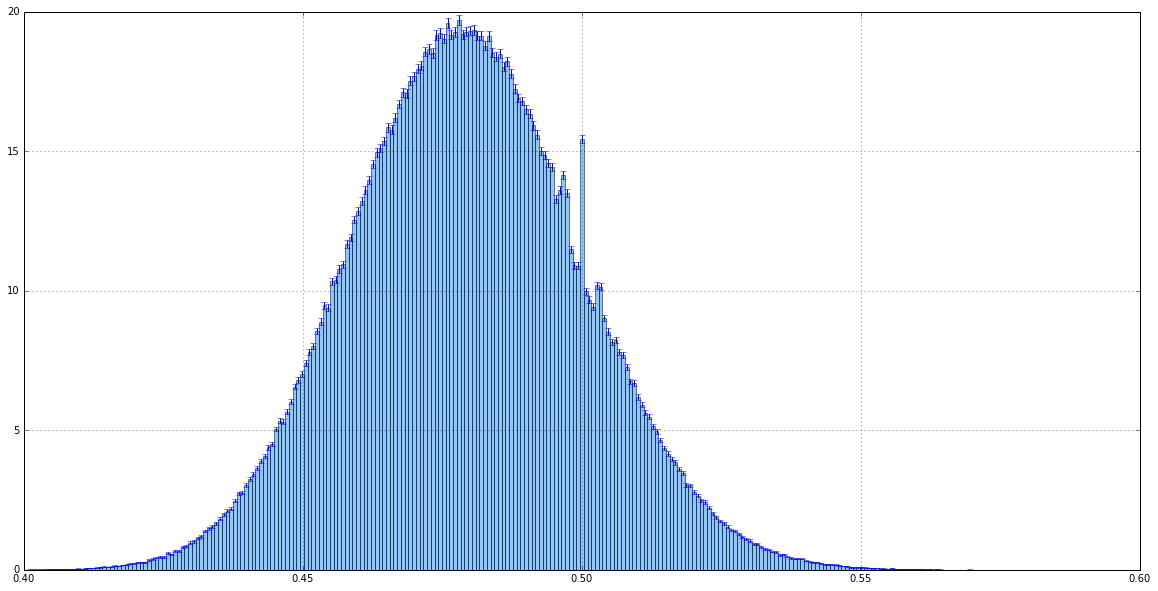

In [23]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 1, 1)

bines = np.linspace(0.4,0.6,300)
numero, bins = np.histogram(R, bins = bines)
error = (np.sqrt(numero) / (np.diff(bins) * np.sum(numero)))
numero = numero / (np.diff(bins) * np.sum(numero)) #normalizo el area
ax1.bar(bins[:-1], numero, width = np.diff(bins),  yerr=error, ecolor="b", color='dodgerblue', alpha=0.5)
#ax1.set_xlabel('k')
#ax1.set_ylabel('P(k)')
ax1.grid()

In [25]:
def esp(b,n):
    return np.sum(np.diff(b)*n*b[:-1])

esperanza = esp(bines, numero)

def lado_izq(hasta, bines, numero, bins):
    cerca = np.argmax([x for x in bines if x < hasta])
    return np.sum(np.diff(bins[:cerca]) * (numero[:cerca-1]))

def lado_der(desde, bines, numero, bins):
    cerca = np.argmax([x for x in bines if x >= desde])
    return np.sum(np.diff(bins[cerca:]) * (numero[cerca:]))

print(esperanza)

0.478993789048


Supongamos que se mide $R_{medido}$. La variable $R_{14}$ esta descripta por la función $$R_{14}=e^{-\frac{ln(2)}{T_{1/2}}t}$$ donde $\tau=\frac{T_{1/2}}{ln(2)}$ es la vida media, $T_{1/2}=5730$ años, y $t$ es la edad que queremos determinar. 

$P(a \leq t \leq b) = 0.68$

$P(a \leq -\frac{T_{1/2}}{ln(2)}ln(R_{14})\leq b) = 0.68$

$P(\exp(\frac{ln(2)}{T_{1/2}}a) \leq R_{14} \leq \exp(\frac{ln(2)}{T_{1/2}}b)) = 0.68$

$P(a' \leq R_{14} \leq b')=0.68)$

Para eso, "movemos" la distribución cambiando el $\mu$ de $^{14}C(t)$, y buscamos que la integral entre 0 y $R_{medido}$ sea 0.16 si movemos la distrtibución para la izquierda, y que la integral entre $R_{medido}$  e infinito sea 0.16 si movemos la distrtibución para la derecha. Para mover la distribución movemos el $\mu_1$ del conteo de $^{14}C(t)$. Si $\mu_1$ es más chico, la distribución de $R_{14}$ se mueve para la izquierda $\Rightarrow$ Calculamos la integral del lado derecho.

Obs.: No movemos el valor de $R_0$ (se supone que el STD es constante) ni tampoco el de $^{12}C_0$ porque la consideramos una magnitud sin error (no sería variable aleatoria).

In [24]:
R_medido = esperanza #Supongamos que se mide esto

Calculo la integral a derecha y me fijo para que valor de $\mu$ (de la Poisson de  $^{14}C(t)$) la integral hasta el valor medido vale 0.16 y 0.84 (1-0.16). Para esos valores, calculamos la esperanza de $R_{14}$.

In [34]:
mu_chicos = np.arange(690,1040,1)
for mu in mu_chicos:
    c14_muestra = poisson.rvs(mu, size=num_muestras) #simulamos
    R_muestra = c14_muestra/c12_muestra 
    R = np.array(R_muestra, dtype=float)/np.array(R_std,dtype=float)
    mask = (R != np.float('+inf'))
    R = R[mask]
    bines = np.linspace(0,1,300)
    numero, bins = np.histogram(R, bins = bines)
    numero = numero / (np.diff(bins) * np.sum(numero)) #normalizo el area
    esperanza = esp(bines, numero)
    lado01 = lado_der(R_medido, bines, numero, bins)
    print(mu,esperanza, lado01)

(690, 0.4117601204013378, 1.4000000000000001e-05)
(691, 0.41235914046822741, 1.2000000000000002e-05)
(692, 0.41296206354515053, 1.8000000000000004e-05)
(693, 0.41355722742474921, 1.1000000000000003e-05)
(694, 0.41415262207357861, 2.0000000000000005e-05)
(695, 0.41474653177257526, 1.9000000000000004e-05)
(696, 0.41535457190635455, 2.3000000000000007e-05)
(697, 0.41595680267558532, 3.1999999999999999e-05)
(698, 0.41655641471571903, 3.6000000000000001e-05)
(699, 0.41716143143812717, 5.1000000000000006e-05)
(700, 0.41776907023411375, 4.7000000000000011e-05)
(701, 0.41834944481605352, 4.3000000000000002e-05)
(702, 0.41892811705685623, 5.8000000000000007e-05)
(703, 0.41953311036789293, 7.3999999999999996e-05)
(704, 0.42017197658862881, 5.9000000000000011e-05)
(705, 0.42074005351170574, 7.5000000000000007e-05)
(706, 0.42133292642140474, 9.1000000000000016e-05)
(707, 0.421950254180602, 0.000107)
(708, 0.42251786622073573, 0.00011)
(709, 0.42315022408026765, 0.00014300000000000001)
(710, 0.4237

$\mu_{min} = 797 \rightarrow R^{min}_{14}  = 0.47590393311036794$ 

$\mu_{max} = 868 \rightarrow R^{max}_{14}  = 0.51840968561872913$ 

Ahora traducimos estos valores en edades máxima y mínima de la muestra.

In [48]:
R0 = mu_std/c12_std
tau = 5730./np.log(2)

def edad(rt):
    return -tau*np.log(rt/R0)

t_medida = edad(mu_muestra/c12_muestra)
# Como la funcion tiene un -, el R_max se traduce en el t_min y viceversa
t_max  = edad(0.47590393311036794*R0)
t_min = edad(0.51840968561872913*R0)
print(round(t_medida,0), round(t_min,0), round(t_max,0))

(6084.0, 5431.0, 6138.0)
